# Introduction to Pandas, Part 2

Advanced Pandas syntax and aggregation.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

## Python lambda function

A simple 1-line function

A lambda function can take any number of arguments, but can only have one expression.

**Syntax**

lambda *arguments* : *expression*

The expression is composed of

- **The keyword**: lambda
- **A bound variable**
- **A body**


In [2]:
#Add 10 to argument a, and return the result:

x = lambda a : a + 10
print(x(5))

15


In [ ]:
# Multiply argument a with argument b and return the result:

x = lambda a, b : a * b
print(x(5, 6))

**High order functions**

Combine with *map* and *filter*

In [3]:
def double(x):
    return x*2

numbers = [1,2,3,4,5]

doubled = list(map(double,numbers))

print(doubled)


[2, 4, 6, 8, 10]


In [4]:
#map: apply the function to every element in the list

doubled2 = list(map(lambda x: x*2,numbers))

print(doubled2)

[2, 4, 6, 8, 10]


In [5]:
#filter 

filtered_numbers = list(filter(lambda x: x%2==0,numbers))

print(filtered_numbers )

[2, 4]


## Dataset - baby names

Let's load the baby names again.

In [2]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Conditional Selection

In [3]:
# Ask yourself: why is :9 is the correct slice to select the first 10 rows?
babynames_first_10_rows = babynames.loc[:9, :]

babynames_first_10_rows

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
5,CA,F,1910,Ruth,128
6,CA,F,1910,Evelyn,126
7,CA,F,1910,Alice,118
8,CA,F,1910,Virginia,101
9,CA,F,1910,Elizabeth,93


In [4]:
# Notice how we have exactly 10 elements in our boolean array argument
babynames_first_10_rows[[True, False, True, False, True, False, True, False, True, False]]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
2,CA,F,1910,Dorothy,220
4,CA,F,1910,Frances,134
6,CA,F,1910,Evelyn,126
8,CA,F,1910,Virginia,101


In [5]:
# First, use a logical condition to generate a boolean array
logical_operator = (babynames["Sex"] == "F")
logical_operator

0          True
1          True
2          True
3          True
4          True
          ...  
400757    False
400758    False
400759    False
400760    False
400761    False
Name: Sex, Length: 400762, dtype: bool

In [6]:
# Then, use this boolean array to filter the DataFrame
babynames[logical_operator]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
235786,CA,F,2021,Zarahi,5
235787,CA,F,2021,Zelia,5
235788,CA,F,2021,Zenobia,5
235789,CA,F,2021,Zeppelin,5


Boolean array selection also works with `loc`!

In [7]:
babynames.loc[babynames["Sex"] == "F"]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
235786,CA,F,2021,Zarahi,5
235787,CA,F,2021,Zelia,5
235788,CA,F,2021,Zenobia,5
235789,CA,F,2021,Zeppelin,5


In [8]:
babynames[(babynames["Sex"] == "F") & (babynames["Year"] < 2000)]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
149044,CA,F,1999,Zareen,5
149045,CA,F,1999,Zeinab,5
149046,CA,F,1999,Zhane,5
149047,CA,F,1999,Zoha,5


In [9]:
(
    babynames[(babynames["Name"] == "Bella") | 
              (babynames["Name"] == "Alex") |
              (babynames["Name"] == "Ani") |
              (babynames["Name"] == "Lisa")]
)
# Note: The parentheses surrounding the code make it possible to break the code on to multiple lines for readability

,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
386576,CA,M,2017,Alex,482
389498,CA,M,2018,Alex,494
392360,CA,M,2019,Alex,436
395230,CA,M,2020,Alex,378


In [10]:
names = ["Bella", "Alex", "Ani", "Lisa"]
babynames[babynames["Name"].isin(names)]

,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
386576,CA,M,2017,Alex,482
389498,CA,M,2018,Alex,494
392360,CA,M,2019,Alex,436
395230,CA,M,2020,Alex,378


In [11]:
babynames[babynames["Name"].str.startswith("N")]

,State,Sex,Year,Name,Count
76,CA,F,1910,Norma,23
83,CA,F,1910,Nellie,20
127,CA,F,1910,Nina,11
198,CA,F,1910,Nora,6
310,CA,F,1911,Nellie,23
...,...,...,...,...,...
400648,CA,M,2021,Nirvan,5
400649,CA,M,2021,Nivin,5
400650,CA,M,2021,Nolen,5
400651,CA,M,2021,Nomar,5


In [12]:
bella_counts = babynames[babynames["Name"] == "Bella"]["Count"]
bella_counts

6289        5
7512        8
35477       5
54487       7
58451       6
68845       6
73387       5
93601       5
96397       5
108054      7
111276      8
114677     10
117991     14
121524     17
125545     13
128946     18
132163     31
136362     15
139366     28
142917     27
146251     39
149607     65
153241     97
156955    122
160707    191
164586    213
168557    310
172646    334
176836    384
181090    439
185287    699
189455    902
193562    777
197554    761
201650    807
205629    704
209653    645
213592    643
217451    719
221207    747
224905    720
228576    566
232200    494
Name: Count, dtype: int64

In [13]:
# Average number of babies named Bella each year

np.mean(bella_counts)

270.1860465116279

In [14]:
# Max number of babies named Bella born on a given year

max(bella_counts)

902

In [15]:
babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
400757,CA,M,2021,Zyan,5
400758,CA,M,2021,Zyion,5
400759,CA,M,2021,Zyire,5
400760,CA,M,2021,Zylo,5


In [16]:
babynames.shape

(400762, 5)

In [17]:
babynames.size

2003810

In [18]:
babynames.describe()

,Year,Count
count,400762.000000,400762.000000
mean,1985.131287,79.953781
std,26.821004,295.414618
min,1910.000000,5.000000
25%,1968.000000,7.000000
50%,1991.000000,13.000000
75%,2007.000000,38.000000
max,2021.000000,8262.000000


In [19]:
babynames["Sex"].describe()

count     400762
unique         2
top            F
freq      235791
Name: Sex, dtype: object

In [20]:
babynames.sample()

,State,Sex,Year,Name,Count
102846,CA,F,1987,Olivia,240


In [21]:
babynames.sample(5).iloc[:, 2:]

,Year,Name,Count
319933,1992,Ramses,12
115952,1990,Deeanna,5
121139,1992,Annabel,27
30168,1952,Rosa,170
192668,2010,Cristy,6


In [22]:
babynames[babynames["Year"] == 2000].sample(4, replace = True).iloc[:, 2:]

,Year,Name,Count
339038,2000,Kristopher,108
149530,2000,Emilia,82
341134,2000,Patric,5
152125,2000,Lindy,6


In [23]:
babynames["Name"].value_counts()

Jean         221
Francis      219
Guadalupe    216
Jessie       215
Marion       213
            ... 
Janin          1
Jilliann       1
Jomayra        1
Karess         1
Zyrus          1
Name: Name, Length: 20239, dtype: int64

In [24]:
babynames["Name"].unique()

array(['Mary', 'Helen', 'Dorothy', ..., 'Zyire', 'Zylo', 'Zyrus'],
      dtype=object)

In [25]:
babynames["Name"].sort_values()

380256      Aadan
362255      Aadan
365374      Aadan
394460    Aadarsh
366561      Aaden
           ...   
232144      Zyrah
217415      Zyrah
197519      Zyrah
220674      Zyrah
400761      Zyrus
Name: Name, Length: 400762, dtype: object

In [26]:
babynames.sort_values(by = "Count", ascending = False)

,State,Sex,Year,Name,Count
263272,CA,M,1956,Michael,8262
264297,CA,M,1957,Michael,8250
313644,CA,M,1990,Michael,8247
278109,CA,M,1969,Michael,8244
279405,CA,M,1970,Michael,8197
...,...,...,...,...,...
159967,CA,F,2002,Arista,5
159966,CA,F,2002,Arisbeth,5
159965,CA,F,2002,Arisa,5
159964,CA,F,2002,Arionna,5


_Note:_ the outer parentheses in the code below aren't strictly necessary, but they make it valid syntax to break the chained method calls in separate lines, which helps readability. The example below finds the top 5 most popular names in California in 2021.

In [27]:
# Sort names by count in year 2021
(
    babynames[babynames["Year"] == 2021]
    .sort_values("Count", ascending = False)
    .head()
)

,State,Sex,Year,Name,Count
397909,CA,M,2021,Noah,2591
397910,CA,M,2021,Liam,2469
232145,CA,F,2021,Olivia,2395
232146,CA,F,2021,Emma,2171
397911,CA,M,2021,Mateo,2108


In [28]:
babynames.sort_values("Name", ascending = False)

,State,Sex,Year,Name,Count
400761,CA,M,2021,Zyrus,5
197519,CA,F,2011,Zyrah,5
232144,CA,F,2020,Zyrah,5
217415,CA,F,2016,Zyrah,5
220674,CA,F,2017,Zyrah,6
...,...,...,...,...,...
360532,CA,M,2008,Aaden,135
394460,CA,M,2019,Aadarsh,6
380256,CA,M,2014,Aadan,5
362255,CA,M,2008,Aadan,7


In [29]:
# Here, a lambda function is applied to find the length of each value, `x`, in the "Name" column

babynames.sort_values("Name", key=lambda x: x.str.len(), ascending = False).head(5)

,State,Sex,Year,Name,Count
313143,CA,M,1989,Franciscojavier,6
333732,CA,M,1997,Ryanchristopher,5
330421,CA,M,1996,Franciscojavier,8
323615,CA,M,1993,Johnchristopher,5
310235,CA,M,1988,Franciscojavier,10


---

### An alternate approach is to create a temporary column corresponding to the length

In [30]:
# Create a Series of the length of each name
babyname_lengths = babynames["Name"].str.len()

# Add a column named "name_lengths" that includes the length of each name
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [31]:
# Sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending=False)
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
313143,CA,M,1989,Franciscojavier,6,15
333732,CA,M,1997,Ryanchristopher,5,15
330421,CA,M,1996,Franciscojavier,8,15
323615,CA,M,1993,Johnchristopher,5,15
310235,CA,M,1988,Franciscojavier,10,15


In [32]:
# Drop the `name_length` column
babynames = babynames.drop("name_lengths", axis = 'columns')
babynames.head(5)

,State,Sex,Year,Name,Count
313143,CA,M,1989,Franciscojavier,6
333732,CA,M,1997,Ryanchristopher,5
330421,CA,M,1996,Franciscojavier,8
323615,CA,M,1993,Johnchristopher,5
310235,CA,M,1988,Franciscojavier,10


We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [10]:
# First, define a function to count the number of times "dr" or "ea" appear in each name
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

# Then, use `map` to apply `dr_ea_count` to each name in the "Name" column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

# Sort the DataFrame by the new "dr_ea_count" column so we can see our handiwork
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,dr_ea_count
101969,CA,F,1986,Deandrea,6,3
115950,CA,F,1990,Deandrea,5,3
131022,CA,F,1994,Leandrea,5,3
304390,CA,M,1985,Deandrea,6,3
108723,CA,F,1988,Deandrea,5,3


In [11]:
# Drop the `dr_ea_count` column
babynames = babynames.drop("dr_ea_count", axis = 'columns')
babynames.head(5)

,State,Sex,Year,Name,Count
101969,CA,F,1986,Deandrea,6
115950,CA,F,1990,Deandrea,5
131022,CA,F,1994,Leandrea,5
304390,CA,M,1985,Deandrea,6
108723,CA,F,1988,Deandrea,5


---

## Female Name whose popularity has dropped the most.

In this exercise, let's find the female name whose popularity has dropped the most since its peak. As an example of a name that has fallen into disfavor, consider "Jennifer", visualized below.

Note: We won't cover plotly in lecture until after Lisa covers EDA and Regex.

Since we're only working with female names, let's create a DataFrame with only female names to simplify our later code.

In [12]:
female_babynames = babynames[babynames["Sex"] == "F"]
female_babynames

,State,Sex,Year,Name,Count
101969,CA,F,1986,Deandrea,6
115950,CA,F,1990,Deandrea,5
131022,CA,F,1994,Leandrea,5
108723,CA,F,1988,Deandrea,5
107840,CA,F,1988,Adreana,8
...,...,...,...,...,...
136793,CA,F,1996,Tabatha,11
136792,CA,F,1996,Sunshine,11
136791,CA,F,1996,Silver,11
136790,CA,F,1996,Shaye,11


In [13]:
fig = px.line(female_babynames[female_babynames["Name"] == "Jennifer"],
              x = "Year", y = "Count")
fig.update_layout(font_size = 18)

In [37]:
female_babynames = female_babynames.sort_values(["Year", "Count"])
female_babynames.head()

,State,Sex,Year,Name,Count
206,CA,F,1910,Althea,5
205,CA,F,1910,Adrienne,5
227,CA,F,1910,Peggy,5
224,CA,F,1910,Mable,5
223,CA,F,1910,Lydia,5


In [14]:
fig = px.line(female_babynames[female_babynames["Name"] == "Jennifer"],
              x = "Year", y = "Count")
fig.update_layout(font_size = 18)

To answer this question, we'll need a mathematical definition for the change in popularity of a name.

For the purposes of lecture, let’s use the RTP or ratio_to_peak. This is the current count of the name divded by its maximum ever count.

Getting the max Jennifer is easy enough.

In [39]:
max_jenn = max(female_babynames[female_babynames["Name"] == "Jennifer"]["Count"])
max_jenn

6065

And we can get the most recent Jennifer count with `iloc[-1]`

In [40]:
curr_jenn = female_babynames[female_babynames["Name"] == "Jennifer"]["Count"].iloc[-1]
curr_jenn

91

In [41]:
curr_jenn / max_jenn

0.015004122011541632

We can also write a function that produces the ratio_to_peak for a given series.

Here for clarity, let's regenerate the `jenn_counts` Series, but let's do so on a DataFrame where the index is the year.

In [42]:
def ratio_to_peak(series):
    return series.iloc[-1] / max(series)

In [43]:
jenn_counts_ser = female_babynames[female_babynames["Name"] == "Jennifer"]["Count"]
ratio_to_peak(jenn_counts_ser)

0.015004122011541632

We can try out various names below: 

In [44]:
ratio_to_peak(female_babynames[female_babynames["Name"] == "Jessica"]["Count"])

0.01524741081703107

### Approach 1: Naive For Loop

As a first approach, we can try to use a for loop.

In [45]:
%%time
# Build dictionary where entry i is the ammd for the given name
# e.g. rtps["jennifer"] should be 0.01500
rtps = {}
for name in female_babynames["Name"].unique()[0:100]:
    counts_of_current_name = female_babynames[female_babynames["Name"] == name]["Count"]
    if counts_of_current_name.size > 0:
        rtps[name] = ratio_to_peak(counts_of_current_name)
    
# Convert to series
rtps = pd.Series(rtps) 
rtps

CPU times: user 1.51 s, sys: 4.14 ms, total: 1.51 s
Wall time: 1.51 s


Althea      0.285714
Adrienne    0.141509
Peggy       0.015674
Mable       0.192308
Lydia       0.567460
              ...   
Matilda     0.736264
Sadie       0.549261
Gloria      0.074777
Helene      0.138889
Minnie      0.121951
Length: 100, dtype: float64

In [46]:
rtps.sort_values()

Carol      0.003635
Carolyn    0.005753
Janet      0.010283
Shirley    0.014567
Peggy      0.015674
             ...   
Faye       0.913793
Nora       0.972973
Goldie     1.000000
Iris       1.000000
Estelle    1.000000
Length: 100, dtype: float64

### Approach 2: Use groupby.agg

Instead, we can use the very powerful groupby.agg operation, which allows us to simply and efficiently compute what we want.

In [47]:
female_babynames.head()

,State,Sex,Year,Name,Count
206,CA,F,1910,Althea,5
205,CA,F,1910,Adrienne,5
227,CA,F,1910,Peggy,5
224,CA,F,1910,Mable,5
223,CA,F,1910,Lydia,5


In [48]:
%%time
rtp_table = female_babynames.groupby("Name").agg(ratio_to_peak)
rtp_table
# Note: If this cell crashes, comment out the code and use the female_babynames.groupby("Name")[["Count"]].agg(ratio_to_peak) instead

CPU times: user 818 ms, sys: 3.76 ms, total: 821 ms
Wall time: 821 ms


<timed exec>:1: FutureWarning:

['State', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Year,Count
Name,,
Aadhira,1.0,0.700000
Aadhya,1.0,0.580000
Aadya,1.0,0.724138
Aahana,1.0,0.192308
Aahna,1.0,1.000000
...,...,...
Zyanya,1.0,0.857143
Zyla,1.0,1.000000
Zylah,1.0,1.000000


If you're using an early enough version of pandas, the code above will not crash, and will automatically drop columns for which `ratio_to_peak` fails, e.g. the Sex column. 

However, according to a warning message that is generated as of January 2023, at some point this code will no longer be considered valid Pandas code, and the code will crash on columns for which the aggregation function is undefined. 

Whether we're trying to avoid a crash, or just want a clean DataFrame, let's explicitly select only the Count column. The idea here is that we don't really care about the meaningless Year column, so we may as well exclude it when we compute our `ratio_to_peak` values. 

In [49]:
rtp_table = female_babynames.groupby("Name")[["Count"]].agg(ratio_to_peak)
rtp_table

,Count
Name,
Aadhira,0.700000
Aadhya,0.580000
Aadya,0.724138
Aahana,0.192308
Aahna,1.000000
...,...
Zyanya,0.857143
Zyla,1.000000
Zylah,1.000000


In [50]:
# This code renames the Count column to RTP. You'll see this syntax in lab
rtp_table = rtp_table.rename(columns = {"Count": "Count RTP"})
rtp_table

,Count RTP
Name,
Aadhira,0.700000
Aadhya,0.580000
Aadya,0.724138
Aahana,0.192308
Aahna,1.000000
...,...
Zyanya,0.857143
Zyla,1.000000
Zylah,1.000000


In [51]:
rtp_table.sort_values("Count RTP")

,Count RTP
Name,
Debra,0.001260
Susan,0.002034
Debbie,0.002817
Cheryl,0.003273
Carol,0.003635
...,...
Jovi,1.000000
Neta,1.000000
Doni,1.000000


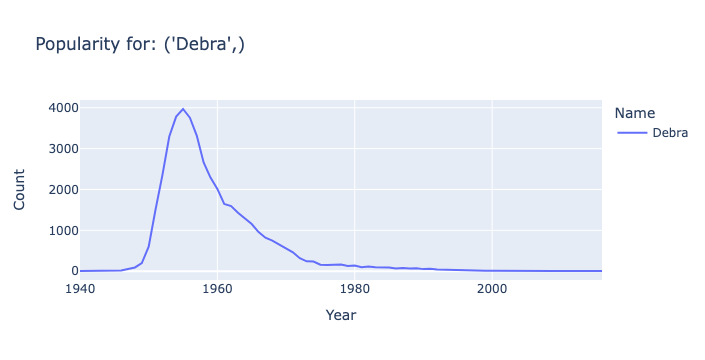

In [52]:
def plot_name(*names):
    return px.line(female_babynames[female_babynames["Name"].isin(names)], 
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names}")

plot_name("Debra")

In [53]:
top10 = rtp_table.sort_values("Count RTP").head(10).index
top10

Index(['Debra', 'Susan', 'Debbie', 'Cheryl', 'Carol', 'Tammy', 'Terri',
       'Shannon', 'Deborah', 'Carolyn'],
      dtype='object', name='Name')

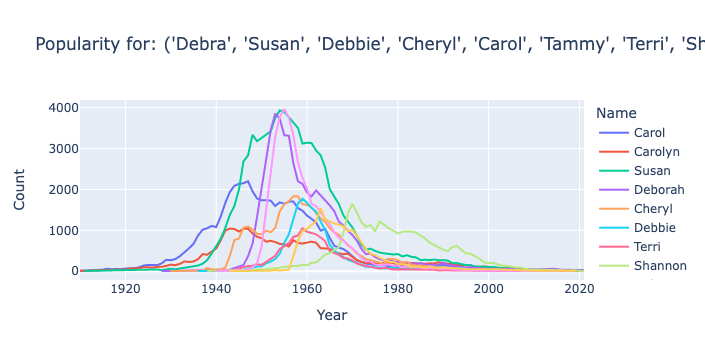

In [54]:
plot_name(*top10)

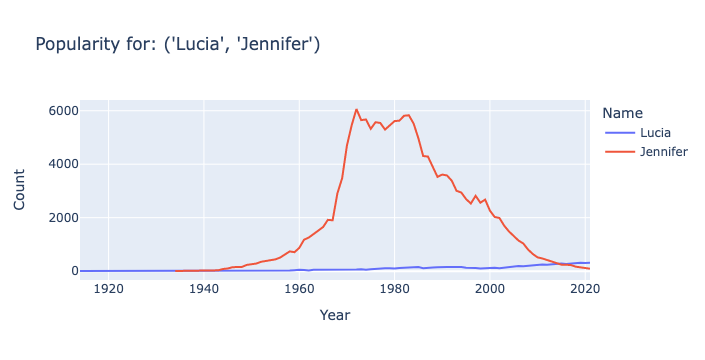

In [55]:
plot_name("Lucia", "Jennifer")

---

## Some Additional Groupby Puzzles

Groupby puzzle #1: Try to create a groupby.agg call that gives the total babies born with each name.

In [56]:
puzzle1 = female_babynames.groupby("Name")[["Count"]].agg(sum)
puzzle1

,Count
Name,
Aadhira,29
Aadhya,397
Aadya,251
Aahana,134
Aahna,7
...,...
Zyanya,186
Zyla,124
Zylah,109


Groupby puzzle #2: Try to create a groupby.agg call that gives total babies born in each year.

In [57]:
puzzle2 = female_babynames.groupby("Year")[["Count"]].agg(sum)
puzzle2

,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
2017,195466
2018,189066
2019,183982


We can write this using a groupby shorthand aggregation method. Here, `sum()` is shorthand for `groupby.agg(sum)`.

In [58]:
puzzle2 = female_babynames.groupby("Year")[["Count"]].sum()

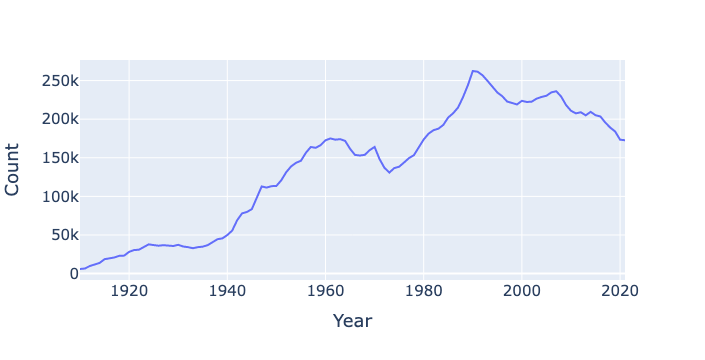

In [59]:
fig = px.line(puzzle2, y = "Count")
fig.update_layout(font_size = 15)

In [60]:
# Not covered in lecture but we can also compute relative births
relative_births = puzzle2 / max(puzzle2["Count"])

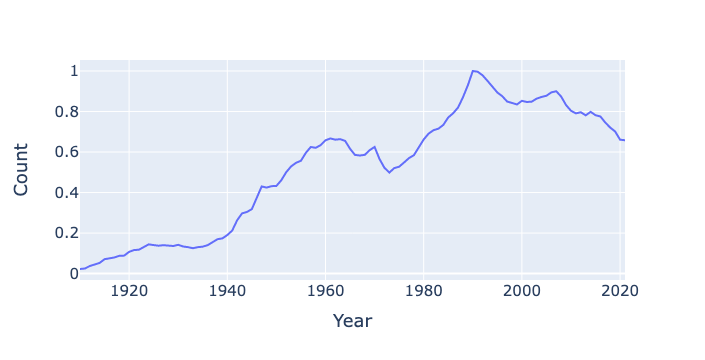

In [61]:
fig = px.line(relative_births, y = "Count")
fig.update_layout(font_size = 15)